In [1]:
# import necessary libraries
import datetime as dt
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
#import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

In [2]:
df = pd.read_csv('11번가.csv')

In [3]:
# 전체 매출액 하위 TOP 10

df_5 = df[df['매출액'] != 0]

# 각 상품명의 매출액 합계를 계산
Sales_amount_by_item = df.groupby('상품명')['매출액'].sum()

# 매출액이 낮은 순서대로 하위 10개 상품만 선택
sorted_items_lowest_revenue_10 = Sales_amount_by_item.nsmallest(10)

sorted_items_lowest_revenue_10

상품명
[11번가] 비비고 두부김치찌개 460gX3                     0
[11번가] 쁘띠첼 미초 파인애플 900ML*2EA                 0
[11번가] 스팸클래식 340Gx2개+마일드340Gx2개              0
[11번가] 작은햇반 130Gx36개                         0
[마켓전략]백설 스모크 치킨&포크 BBQ소스 315g*3              0
[복합_마켓전략]비비고 순살고등어구이 60gx5+갈치구이 70gx4(냉동)    0
[복합_마켓전략]쁘띠첼 과일젤리 어린이 간식세트 5종 15개(개당210g)    0
비비고 두부김치찌개 460g                              0
비비고 열무김치 2.3KG                               0
삼호어묵 안심부산어묵 도톰쫄깃240g*2                       0
Name: 매출액, dtype: int64

In [4]:
# 전체 매출액 상위 TOP 10

df = df[df['매출액'] != 0]

# 각 상품명의 매출액 합계를 계산
Sales_amount_item = df.groupby('상품명')['매출액'].sum()

# 매출액이 높은 순서대로 상위 10개 상품만 선택
sorted_items_highest_revenue_10 = Sales_amount_item.nlargest(10)

sorted_items_highest_revenue_10

상품명
오천년의 신비 명품천일염(굵은입자) 10kg                            1514920
비비고 BASIC 포기배추김치 10kg(직택배)                          1177800
[복합_마켓전략]주먹밥세트(소고기버섯+불닭마요+갈릭마요+치즈닭갈비+김치치즈+버터장조림)     881400
[복합_마켓전략]주먹밥쟁여두기(스팸김치2+참치마요2+불고기2)                   881400
[복합_마켓전략]에어프라이어 칼집 군밤 톡톡까먹어밤 500GX3                  712500
[복합_마켓전략][번들_마켓전략]더건강한닭가슴살 큐브톡톡 ALL 96g(10+10)       597000
[복합_마켓전략]시원 아삭한 비비고 포기김치 10kg+총각김치 900g              566300
백설 빵가루 1kg                                           448800
다담 정통된장찌개 양념 140gX3                                  446306
[11번가] 다담 순두부찌개양념 140gX4개                            424913
Name: 매출액, dtype: int64

In [22]:
# 매출액이 0이 아닌 데이터만 선택합니다.
df = df[df['매출액'] != 0]

Sales_amount_item = df.groupby('상품명')['매출액'].sum()

sorted_items_lowest_revenue_10 = Sales_amount_item.nsmallest(10)

def get_item_type(item_name):
    if '묶음' in item_name:
        return '묶음상품'
    else:
        return '단일상품'

# 상품 유형 컬럼
sorted_items_lowest_revenue_10_with_type = sorted_items_lowest_revenue_10.reset_index()
sorted_items_lowest_revenue_10_with_type['상품유형'] = sorted_items_lowest_revenue_10_with_type['상품명'].apply(get_item_type)

# 정렬된 상품명, 매출액, 상품 유형
print(sorted_items_lowest_revenue_10_with_type)

                            상품명   매출액  상품유형
0                 비비고 사골곰탕 500g  2200  단일상품
1                   허브맛솔트마늘맛50g  2970  단일상품
2     [11번가] 백설 영양균형 핫케익믹스 400g  3330  단일상품
3         [11번가] 백설 찹쌀호떡믹스 400g  3330  단일상품
4       [11번가] 백설 초코칩 쿠키믹스 290g  3330  단일상품
5  [공용_마켓전략]햇반소프트밀 누룽지닭백숙죽 280g  3350  단일상품
6        [공용_마켓전략] 백설 통밀밀가루 1kg  3500  단일상품
7              다담 깻잎지양념 150GX2개  4409  단일상품
8     [공용_마켓전략]해찬들 찍장 매콤쌈장 300g  4470  단일상품
9                다시다 골드 쇠고기 96g  5080  단일상품


In [23]:
df = df[df['매출액'] != 0]

# 각 상품명의 매출액 합계를 계산
Sales_amount_item = df.groupby('상품명')['매출액'].sum()

# 매출액이 높은 순서대로 상위 10개 상품만 선택
sorted_items_highest_revenue_10 = Sales_amount_item.nlargest(10)

def get_item_type(item_name):
    if '묶음' in item_name:
        return '묶음상품'
    else:
        return '단일상품'

sorted_items_highest_revenue_10_with_type = sorted_items_highest_revenue_10.reset_index()
sorted_items_highest_revenue_10_with_type['상품유형'] = sorted_items_highest_revenue_10_with_type['상품명'].apply(get_item_type)

print(sorted_items_highest_revenue_10_with_type)

                                                상품명      매출액  상품유형
0                          오천년의 신비 명품천일염(굵은입자) 10kg  1514920  단일상품
1                        비비고 BASIC 포기배추김치 10kg(직택배)  1177800  단일상품
2  [복합_마켓전략]주먹밥세트(소고기버섯+불닭마요+갈릭마요+치즈닭갈비+김치치즈+버터장조림)   881400  단일상품
3                [복합_마켓전략]주먹밥쟁여두기(스팸김치2+참치마요2+불고기2)   881400  단일상품
4               [복합_마켓전략]에어프라이어 칼집 군밤 톡톡까먹어밤 500GX3   712500  단일상품
5    [복합_마켓전략][번들_마켓전략]더건강한닭가슴살 큐브톡톡 ALL 96g(10+10)   597000  단일상품
6           [복합_마켓전략]시원 아삭한 비비고 포기김치 10kg+총각김치 900g   566300  단일상품
7                                        백설 빵가루 1kg   448800  단일상품
8                               다담 정통된장찌개 양념 140gX3   446306  단일상품
9                         [11번가] 다담 순두부찌개양념 140gX4개   424913  단일상품


### 판매량

In [24]:
# 판매량 하위 TOP 10

item_counts = df['상품명'].value_counts()

# 빈도수가 낮은 순서대로 하위 10개 물건만 선택하여 정렬
sorted_items_bottom_10 = item_counts.nsmallest(10)

print(sorted_items_bottom_10)

비비고 미역국 500g                      1
[11번가] 고메 바르셀로나칠리감바스피자 350g       1
고메 마르게리타 피자 325g                  1
고메 순살치킨 스윗허니 450g                 1
[11번가]백설 대왕 납작당면 300g             1
[공용_마켓전략]백설 초당옥수수호떡믹스 300g        1
허브맛솔트마늘맛50g                       1
비비고 차돌깍두기볶음밥410GX2                1
[11번가] 즐거운동행 미정당 방앗간참쌀떡국떡 400g    1
[11번가] 백설 오븐용 깨찰빵믹스 500g          1
Name: 상품명, dtype: int64


In [25]:
# 판매량 상위 TOP 10

item_counts = df['상품명'].value_counts()

# 빈도수가 높은 순서대로 상위 10개 물건만 선택하여 정렬
sorted_items_top_10 = item_counts.nlargest(10)

print(sorted_items_top_10)

[복합_마켓전략]주먹밥세트(소고기버섯+불닭마요+갈릭마요+치즈닭갈비+김치치즈+버터장조림)    144
다담 정통된장찌개 양념 140gX3                                  89
[복합_마켓전략]주먹밥쟁여두기(스팸김치2+참치마요2+불고기2)                   75
[11번가] 다담 순두부찌개양념 140gX4개                            63
[11번가] 다담 정통된장찌개 양념 140gX3개                          43
[11번가] 다담 우렁강된장 비빔 양념 140GX3개입                       26
오천년의 신비 명품천일염(굵은입자) 10kg                             24
비비고 BASIC 포기배추김치 10kg(직택배)                           22
[11번가]다담 부대찌개양념 140Gx3개                              20
삼호어묵 부산어묵 바른사각 240g                                  16
Name: 상품명, dtype: int64


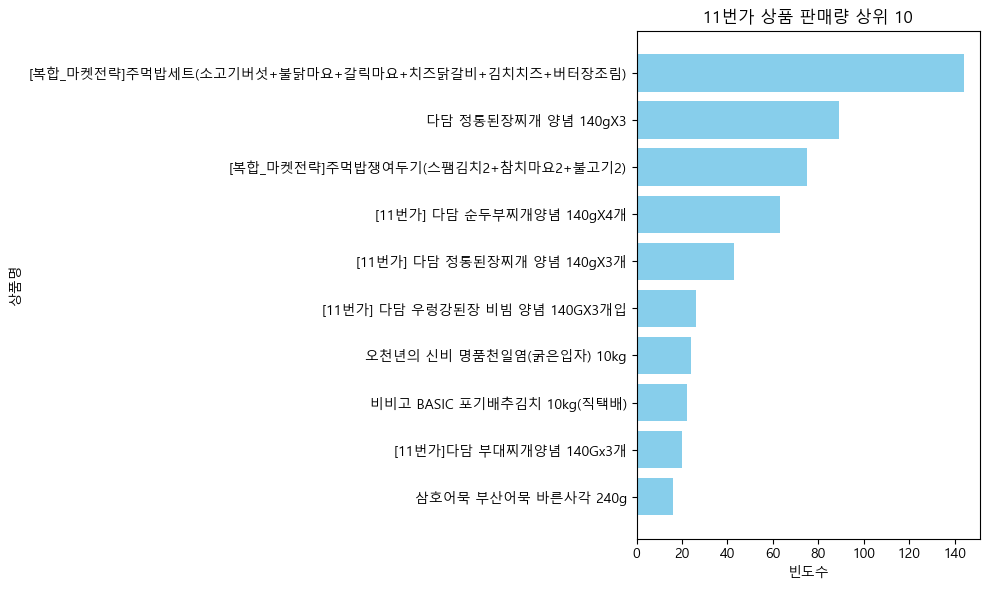

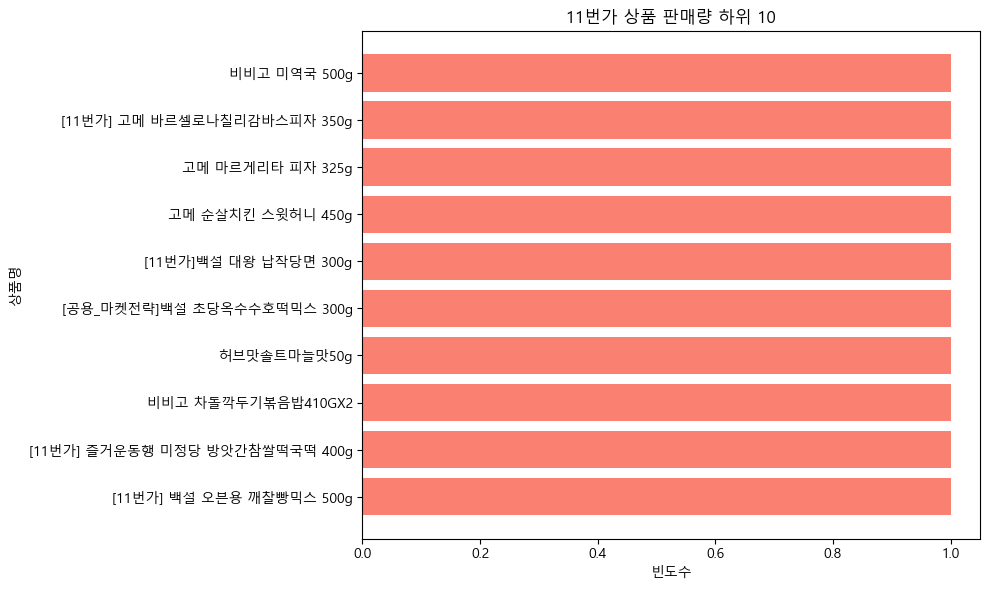

In [26]:
# 판매량 시각화
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 설정
font_path = "C:\\Windows\\Fonts\\malgun.ttf"  # "맑은 고딕" 폰트 파일 경로
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_name)

# 판매량 상위 10개 상품의 빈도수를 계산
item_counts_top_10 = df['상품명'].value_counts().nlargest(10)

# 판매량 하위 10개 상품의 빈도수를 계산
item_counts_bottom_10 = df['상품명'].value_counts().nsmallest(10)

# 상위 10개 상품의 정보를 추출
sorted_items_top_10 = item_counts_top_10.reset_index()
sorted_items_top_10.columns = ['상품명', '빈도수']

# 하위 10개 상품의 정보를 추출
sorted_items_bottom_10 = item_counts_bottom_10.reset_index()
sorted_items_bottom_10.columns = ['상품명', '빈도수']

# 빈도수가 높은 순서대로 상위 10개 상품
plt.figure(figsize=(10, 6))
plt.barh(sorted_items_top_10['상품명'], sorted_items_top_10['빈도수'], color='skyblue')
plt.xlabel('빈도수')
plt.ylabel('상품명')
plt.title('11번가 상품 판매량 상위 10')
plt.gca().invert_yaxis()  
plt.tight_layout()  
plt.show()

# 빈도수가 낮은 순서대로 하위 10개 상품
plt.figure(figsize=(10, 6))
plt.barh(sorted_items_bottom_10['상품명'], sorted_items_bottom_10['빈도수'], color='salmon')
plt.xlabel('빈도수')
plt.ylabel('상품명')
plt.title('11번가 상품 판매량 하위 10')
plt.gca().invert_yaxis()  
plt.tight_layout()  
plt.show()
